In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm as cm_mlib
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc, colors
from IPython.display import HTML
from brian2.units import *
import matplotlib as mlib
from scipy import stats
from pprint import pprint as pp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from simulation_statistics.analysis_functions_definitions import *

In [2]:
mlib.rcParams.update({'font.size': 24})
mlib.rcParams.update({'errorbar.capsize': 5})
mlib.rcParams.update({'figure.autolayout': True})

In [144]:
# RANDOM DELAY
# fname= "results_for_testing_random_delay_drifting_grating_6k_sigma_5_5_no_jiggling_1xrt" # Good!
# fname= "results_for_testing_random_delay_drifting_grating_24k_sigma_5_5_no_jiggling_1xrt_top2_2angles" # Maybe good, interesting butterfly.
# fname= "results_for_testing_random_delay_drifting_grating_48k_sigma_5_5_no_jiggling_1xrt_top2_2angles" # Abysmal!
# fname= "results_for_testing_random_random_delay_drifting_grating_6k_sigma_7.5_5_no_jiggling_1xrt_2" # Good, but different from initial simulations. Jitter?
# fname= "results_for_testing_random_delay_drifting_grating_24k_sigma_5_5_no_jiggling_1xrt_top2_2angles_test_analysis"
# fname = "results_for_testing_random_delay_drifting_grating_24k_sigma_5_5_no_jiggling_1xrt_top3_2angles_2" # Amazing sheeet!
# fname = "results_for_testing_random_delay_drifting_grating_24k_sigma_5_5_no_jiggling_1xrt_top3_2angles" # Amazing sheeet!
# fname = "results_for_testing_random_delay_drifting_grating_24k_sigma_5_5_no_jiggling_1xrt_top2_2angles_test_analysis" 
# fname = "results_for_testing_random_delay_drifting_grating_24k_sigma_5_3_top3"

# This is going to be interesting....
fname= "results_for_testing_random_delay_drifting_grating_24k_sigma_5_5_top3_all_angles"

# Bias testing
# fname = "results_for_testing_random_delay_drifting_grating_24k_sigma_5_3_top3_angle_45"
# fname = "results_for_testing_random_delay_drifting_grating_24k_sigma_5_3_top3"

# Right... let's test if the bias comes from the distance / probability metric 
# fname = "results_for_testing_random_delay_drifting_grating_24k_equidistant_0" # 0 degrees, looks fine?
# fname = "results_for_testing_random_delay_drifting_grating_24k_equidistant" # 45 degrees, 


# CONSTANT DELAY
# fname= "results_for_constant_random_delay_drifting_grating_6k_sigma_5_5_no_jiggling_1xrt"
# fname = "results_for_testing_constant_random_delay_drifting_grating_6k_sigma_7.5_5_no_jiggling_1xrt_2"

cached_data = np.load("C:\Work\phd\simulation_statistics\\" + fname + ".npz")
testing_data = np.load("C:\Work\phd\synaptogenesis\spiking_moving_bar_input\spiking_moving_bar_motif_bank_simtime_1200s.npz")


In [145]:
rate_means = cached_data['rate_means']
rate_stds = cached_data['rate_stds']
rate_sem = cached_data['rate_sem']
all_rates = cached_data['all_rates']
radians = cached_data['radians']
instaneous_rates = cached_data['instaneous_rates']
per_neuron_instaneous_rates = cached_data['per_neuron_instaneous_rates']
angles = cached_data['angles']
actual_angles = cached_data['actual_angles']
target_neuron_mean_spike_rate = cached_data[
    'target_neuron_mean_spike_rate']

# Connection information
ff_connections = cached_data['ff_connections']
lat_connections = cached_data['lat_connections']
noise_connections = cached_data['noise_connections']
ff_off_connections = cached_data['ff_off_connections']

final_ff_conn_field= cached_data['final_ff_conn_field']
final_ff_num_field= cached_data['final_ff_num_field']
final_lat_conn_field= cached_data['final_lat_conn_field']
final_lat_num_field= cached_data['final_lat_num_field']

ff_last = cached_data['ff_last']
off_last = cached_data['off_last']
noise_last = cached_data['noise_last']
lat_last = cached_data['lat_last']


per_neuron_all_rates = cached_data['per_neuron_all_rates']

In [146]:
N_layer = 32**2

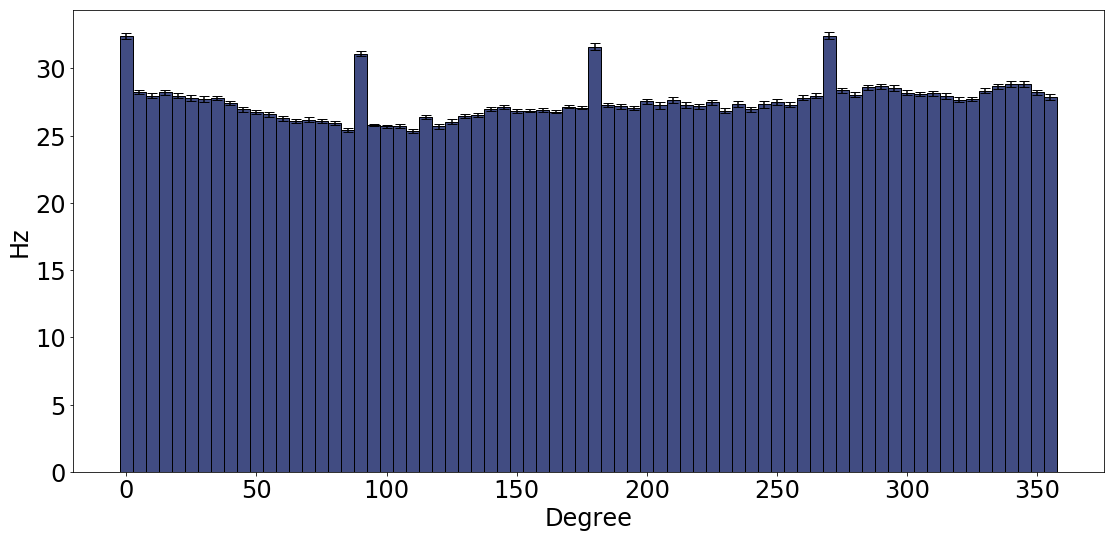

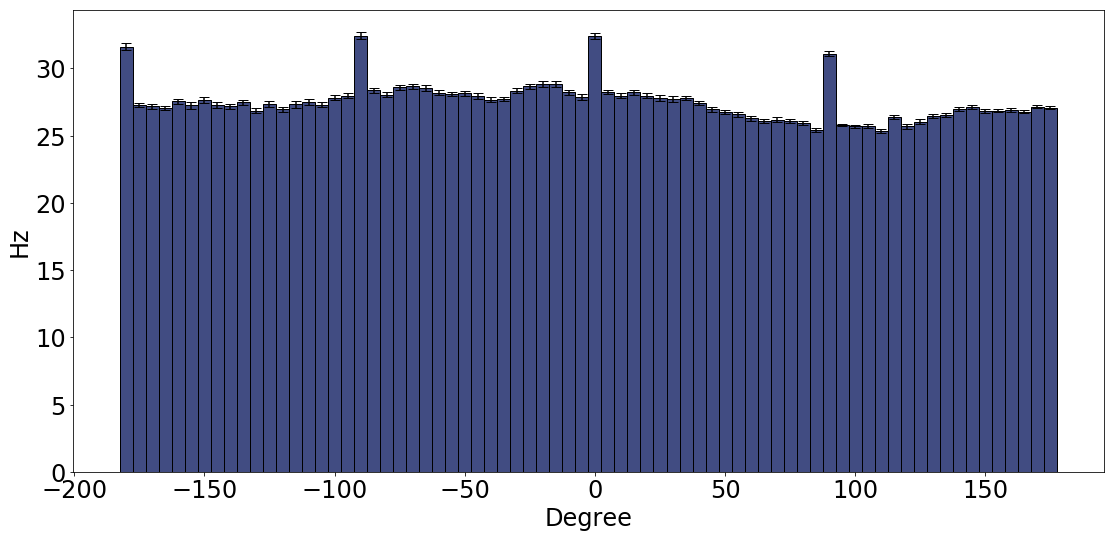

In [147]:
fig = plt.figure(figsize=(16, 8), dpi=600)
y, binEdges = np.histogram(angles, bins=angles.size)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
width = 5
plt.bar(angles, rate_means, width=width, yerr=rate_sem,
        color='#414C82', edgecolor='k')
plt.xlabel("Degree")
plt.ylabel("Hz")
plt.savefig("firing_rate_with_angle_hist.png")
fig = plt.figure(figsize=(16, 8), dpi=600)
y, binEdges = np.histogram(angles, bins=angles.size)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
width = 5
plt.bar(angles-180, np.roll(rate_means,180//5), width=width, yerr=np.roll(rate_sem,180//5),
        color='#414C82', edgecolor='k')
plt.xlabel("Degree")
plt.ylabel("Hz")
plt.savefig("firing_rate_with_angle_hist_centred.png")
plt.show()

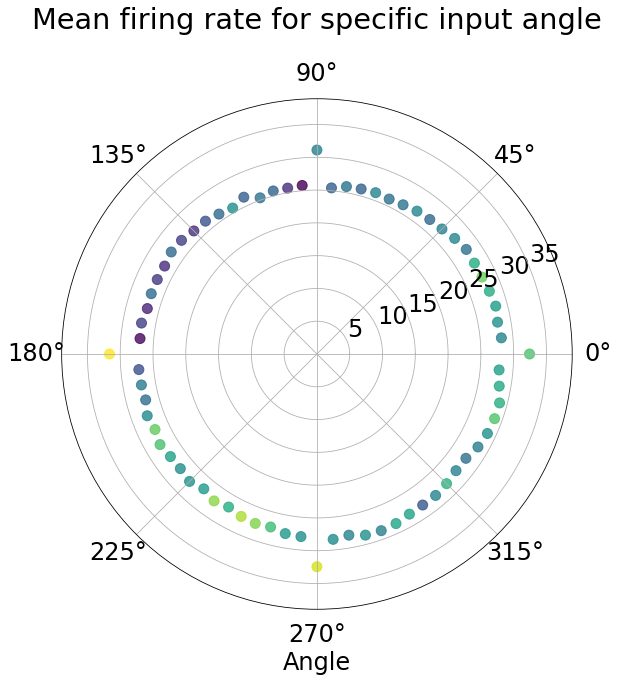

In [148]:
fig = plt.figure(figsize=(10, 10), dpi=600)
ax = plt.subplot(111, projection='polar')
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
c = plt.scatter(radians, rate_means, c=rate_sem,
                s=100)
c.set_alpha(0.8)
plt.ylim([0, 1.2 * np.max(rate_means)])
plt.xlabel("Angle")

ax.set_title("Mean firing rate for specific input angle\n",
             va='bottom')
plt.savefig("firing_rate_with_angle.png")
plt.show()

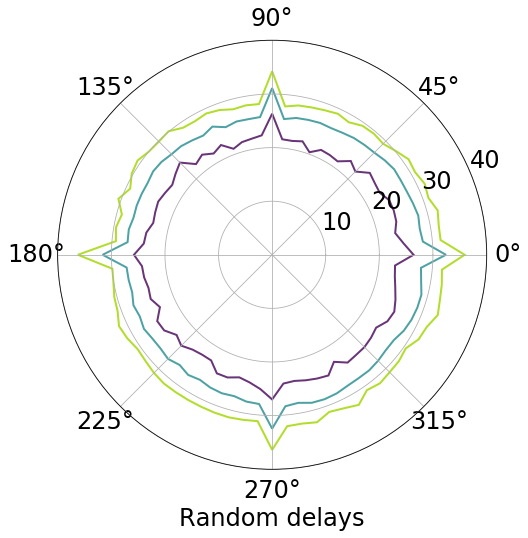

In [149]:
f, ax = plt.subplots(1, 1, figsize=(15, 8), subplot_kw=dict(projection='polar'), dpi=800)

# '#440357'  '#228b8d', '#b2dd2c'

maximus = np.max((rate_means))
minimus = 0

c = ax.fill(radians, rate_means, fill=False, edgecolor='#228b8d',
            lw=2, alpha=.8, label="Mean response")
mins = [np.min(r) for r in all_rates]
ax.fill(radians, mins, fill=False, edgecolor='#440357', lw=2,
        alpha=.8, label="Min response")
maxs = [np.max(r) for r in all_rates]
ax.fill(radians, maxs, fill=False, edgecolor='#b2dd2c', lw=2,
        alpha=1, label="Max response")
maximus = np.max(maxs)
ax.set_ylim([minimus, 1.1 * maximus])
ax.set_xlabel("Random delays")
plt.savefig("rate_means_min_max_mean.png", bbox_inches='tight')
plt.show()

('mean', 27.510633138020832)
('skew', 1.0975232400351143)
('kurtosis', 0.003821149638669308)
('normality', NormaltestResult(statistic=8.1130116267088148, pvalue=0.017309395829913587))


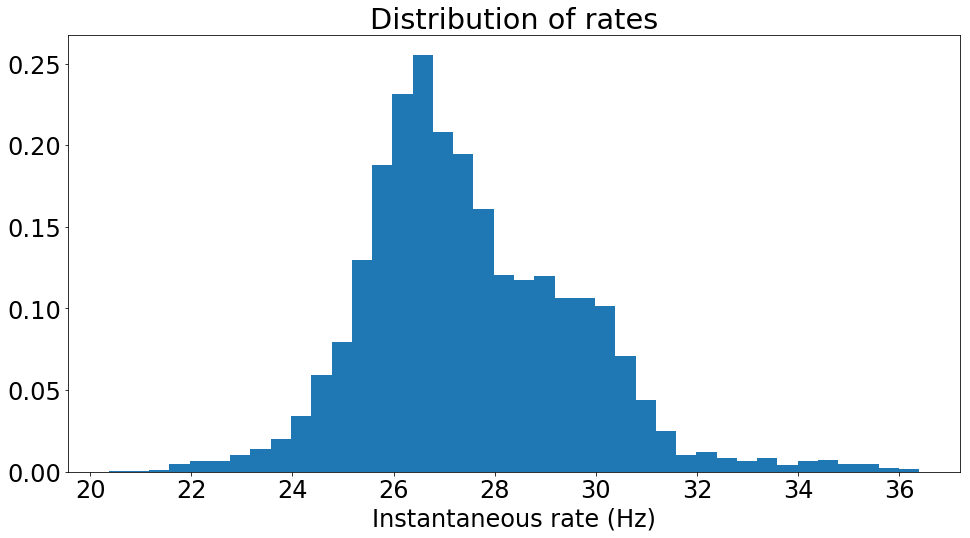

In [150]:
plt.figure(figsize=(14, 8), dpi=600)
n, bins, patches = plt.hist(instaneous_rates, bins=40, normed=True)
print("mean", np.mean(instaneous_rates))
print("skew", stats.skew(n))
print("kurtosis", stats.kurtosis(n))
print("normality", stats.normaltest(n))
plt.title("Distribution of rates")
plt.xlabel("Instantaneous rate (Hz)")
plt.show()

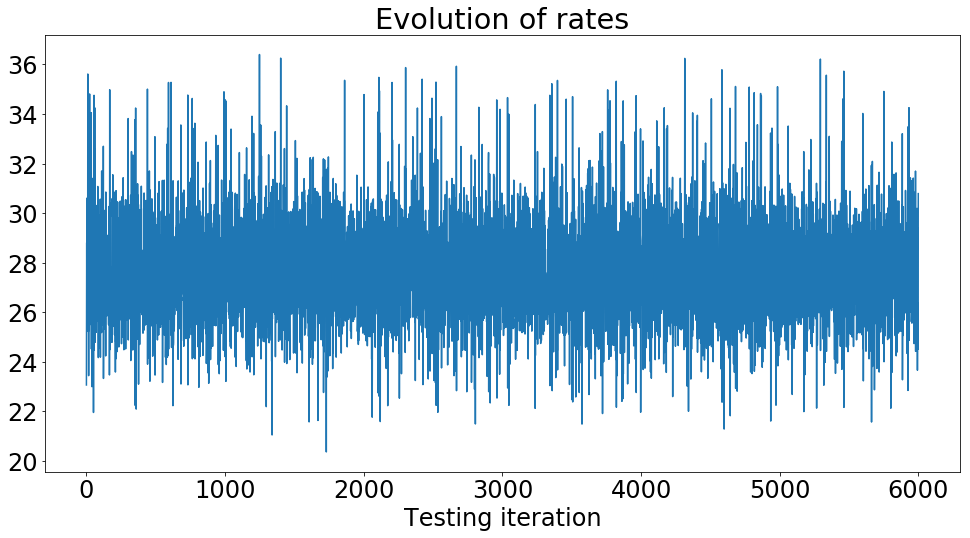

In [151]:
plt.figure(figsize=(14, 8), dpi=600)
plt.plot(instaneous_rates)
plt.title("Evolution of rates")
plt.xlabel("Testing iteration")
plt.show()

sum_of_responses mean 220.24156727
sum_of_responses std 5.78273539263


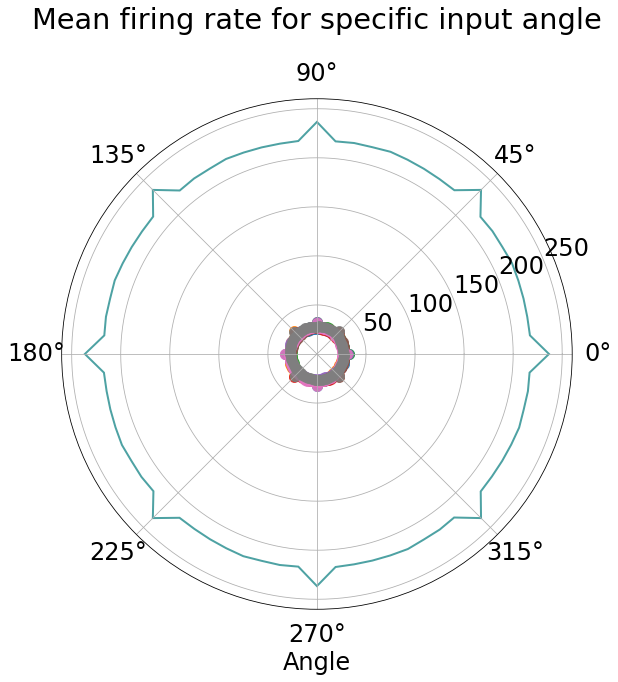

In [152]:
fig = plt.figure(figsize=(10, 10), dpi=600)
ax = plt.subplot(111, projection='polar')
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
no_stacks = 8
stacked_angles = np.zeros((no_stacks, angles.size))
for i in range(no_stacks):
    stacked_angles[i] = np.roll(rate_means, i*(360//no_stacks))
    c = plt.scatter(radians, stacked_angles[i], s=100)
    c.set_alpha(0.8)
    
sum_of_responses = np.sum(stacked_angles, axis=0)
sum_of_responses = np.sum(stacked_angles, axis=0)
print "sum_of_responses mean", np.mean(sum_of_responses)
print "sum_of_responses std", np.std(sum_of_responses)
ax.fill(radians, sum_of_responses, fill=False, edgecolor='#228b8d',
            lw=2, alpha=.8, label="Mean response")
plt.ylim([0, 1.1 * np.max(sum_of_responses)])
plt.xlabel("Angle")

ax.set_title("Mean firing rate for specific input angle\n",
             va='bottom')
plt.savefig("firing_rate_with_angle_stacked.png")
plt.show()

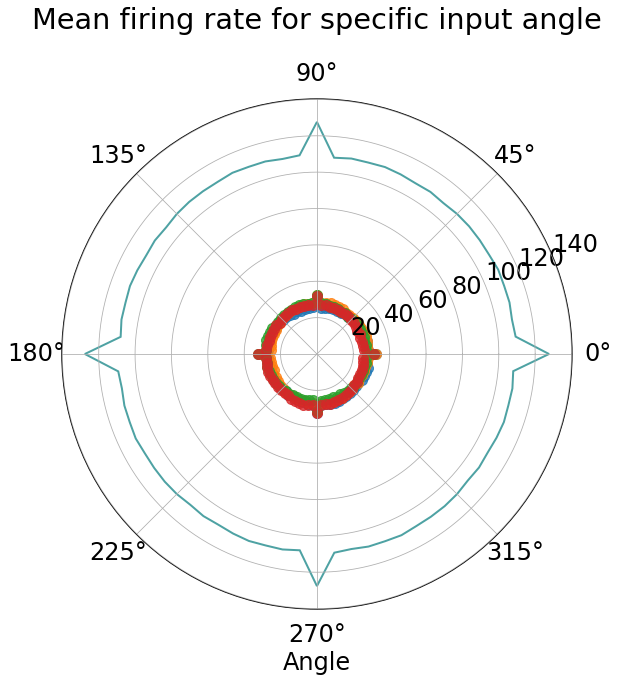

In [153]:
fig = plt.figure(figsize=(10, 10), dpi=600)
ax = plt.subplot(111, projection='polar')
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
no_stacks = 4
stacked_angles = np.zeros((no_stacks, angles.size))
for i in range(no_stacks):
    stacked_angles[i] = np.roll(rate_means, i*(360//no_stacks))
    c = plt.scatter(radians, stacked_angles[i], s=100)
    c.set_alpha(0.8)
    
sum_of_responses = np.sum(stacked_angles, axis=0)
ax.fill(radians, sum_of_responses, fill=False, edgecolor='#228b8d',
            lw=2, alpha=.8, label="Mean response")
plt.ylim([0, 1.1 * np.max(sum_of_responses)])
plt.xlabel("Angle")

ax.set_title("Mean firing rate for specific input angle\n",
             va='bottom')
plt.savefig("firing_rate_with_angle_stacked_4.png")
plt.show()

sum_of_responses mean 110.120783635
sum_of_responses std 3.05470065776


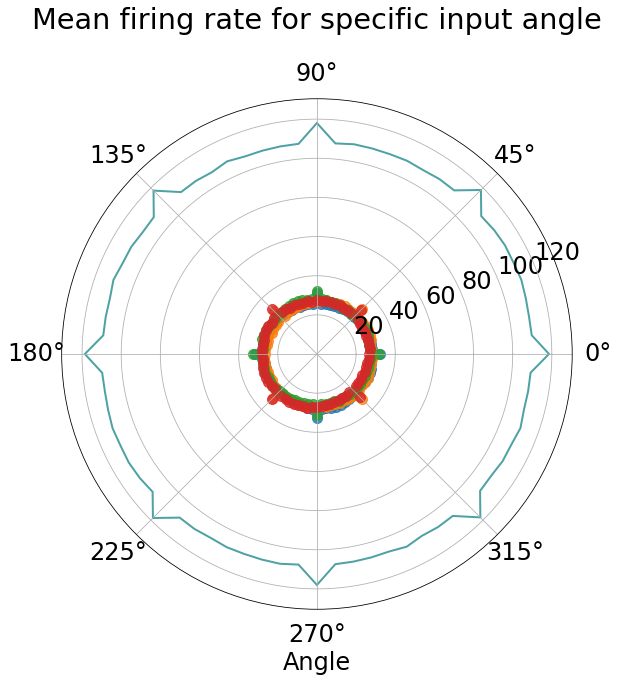

In [154]:
fig = plt.figure(figsize=(10, 10), dpi=600)
ax = plt.subplot(111, projection='polar')
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
no_stacks = 4
stacked_angles = np.zeros((no_stacks, angles.size))
rotation_angles = np.array([0, 45, 180, 225])
for i in range(no_stacks):
    stacked_angles[i] = np.roll(rate_means, rotation_angles[i]//5)
    c = plt.scatter(radians, stacked_angles[i], s=100)
    c.set_alpha(0.8)
    
sum_of_responses = np.sum(stacked_angles, axis=0)
print "sum_of_responses mean", np.mean(sum_of_responses)
print "sum_of_responses std", np.std(sum_of_responses)
ax.fill(radians, sum_of_responses, fill=False, edgecolor='#228b8d',
            lw=2, alpha=.8, label="Mean response")
plt.ylim([0, 1.1 * np.max(sum_of_responses)])
plt.xlabel("Angle")

ax.set_title("Mean firing rate for specific input angle\n",
             va='bottom')
plt.savefig("firing_rate_with_angle_stacked_4_2.png")
plt.show()

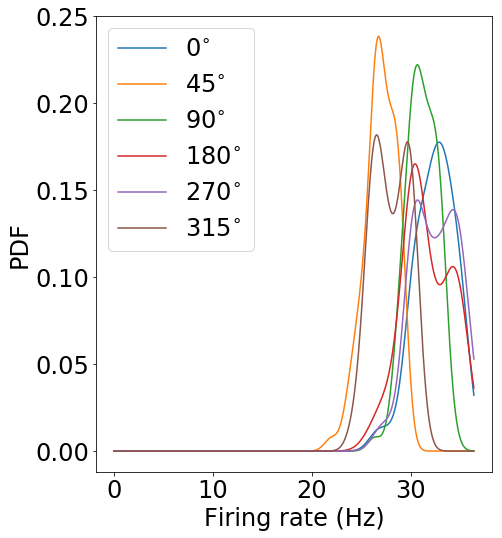

In [155]:
fig = plt.figure(figsize=(7.5, 8), dpi=600)
k = stats.kde.gaussian_kde(all_rates[0],'silverman')
# rnge= np.arange(0, maximus)
rnge= np.linspace(0, maximus, 1000)
plt.plot(rnge, k(rnge), label="$0^{\circ}$ ")
k = stats.kde.gaussian_kde(all_rates[45//5],'silverman')
plt.plot(rnge, k(rnge), label="$45^{\circ}$ ")
k = stats.kde.gaussian_kde(all_rates[90//5],'silverman')
plt.plot(rnge, k(rnge), label="$90^{\circ}$ ")
k = stats.kde.gaussian_kde(all_rates[180//5],'silverman')
plt.plot(rnge, k(rnge), label="$180^{\circ}$ ")
k = stats.kde.gaussian_kde(all_rates[270//5],'silverman')
plt.plot(rnge, k(rnge), label="$270^{\circ}$ ")
k = stats.kde.gaussian_kde(all_rates[315//5],'silverman')
plt.plot(rnge, k(rnge), label="$315^{\circ}$ ")

plt.legend(loc='best')
plt.xlabel("Firing rate (Hz)")
plt.ylabel("PDF")
plt.savefig("firing_rate_pdf_random.png", bbox_inches='tight')
plt.show()

In [156]:
per_neuron_all_rates[0].shape

(84992L,)

In [ ]:
zero_responses = per_neuron_all_rates[0].reshape(32, 32, per_neuron_all_rates[0].shape[0]//1024)
perp_responses = per_neuron_all_rates[90//5].reshape(32, 32, per_neuron_all_rates[90//5].shape[0]//1024)
a225_responses = per_neuron_all_rates[225//5].reshape(32, 32, per_neuron_all_rates[225//5].shape[0]//1024)

mean_zero_responses = np.mean(zero_responses, axis=2)
mean_perp_responses = np.mean(perp_responses, axis=2)
mean_a225_responses = np.mean(a225_responses, axis=2)

In [ ]:
f, (ax,ax2, ax3) = plt.subplots(1, 3, figsize=(22, 8), dpi=800)
response_maximus = np.max((mean_zero_responses, mean_perp_responses, mean_a225_responses))
ax.imshow(mean_zero_responses, vmin=0, vmax=response_maximus)
ax2.imshow(mean_perp_responses, vmin=0, vmax=response_maximus)
ax3.imshow(mean_a225_responses, vmin=0, vmax=response_maximus)
print "max of mean", response_maximus
print "mean of 0 response", np.mean(mean_zero_responses)
print "mean of 90 response", np.mean(mean_perp_responses)
print "mean of 225 response", np.mean(mean_a225_responses)
plt.savefig("per_angle_response_0_90_225.png", bbox_inches='tight')
plt.show()

In [ ]:
max_0_neuron_position = np.argwhere(mean_zero_responses==np.max(mean_zero_responses))[0]
print max_0_neuron_position
fig = plt.figure(figsize=(7.5, 8), dpi=800)

resp = per_neuron_all_rates[0].reshape(32, 32, per_neuron_all_rates[0].shape[0]//1024)
k = stats.kde.gaussian_kde(resp[max_0_neuron_position[0], max_0_neuron_position[1], :],'silverman')
# rnge= np.arange(0, maximus)
maximus_maximus_response = np.max(per_neuron_all_rates[0].reshape(32, 32, per_neuron_all_rates[0].shape[0]//1024))
rnge= np.linspace(0, 1.1*maximus_maximus_response, 1000)
plt.plot(rnge, k(rnge), label="$0^{\circ}$ ")
resp = per_neuron_all_rates[45//5].reshape(32, 32, per_neuron_all_rates[45//5].shape[0]//1024)
k = stats.kde.gaussian_kde(resp[max_0_neuron_position[0], max_0_neuron_position[1], :],'silverman')
plt.plot(rnge, k(rnge), label="$45^{\circ}$ ")
resp = per_neuron_all_rates[90//5].reshape(32, 32, per_neuron_all_rates[90//5].shape[0]//1024)
k = stats.kde.gaussian_kde(resp[max_0_neuron_position[0], max_0_neuron_position[1], :],'silverman')
plt.plot(rnge, k(rnge), label="$90^{\circ}$ ")
resp = per_neuron_all_rates[180//5].reshape(32, 32, per_neuron_all_rates[180//5].shape[0]//1024)
k = stats.kde.gaussian_kde(resp[max_0_neuron_position[0], max_0_neuron_position[1], :],'silverman')
plt.plot(rnge, k(rnge), label="$180^{\circ}$ ")
resp = per_neuron_all_rates[270//5].reshape(32, 32, per_neuron_all_rates[270//5].shape[0]//1024)
k = stats.kde.gaussian_kde(resp[max_0_neuron_position[0], max_0_neuron_position[1], :],'silverman')
plt.plot(rnge, k(rnge), label="$270^{\circ}$ ")
resp = per_neuron_all_rates[315//5].reshape(32, 32, per_neuron_all_rates[315//5].shape[0]//1024)
k = stats.kde.gaussian_kde(resp[max_0_neuron_position[0], max_0_neuron_position[1], :],'silverman')
plt.plot(rnge, k(rnge), label="$315^{\circ}$ ")

plt.legend(loc='upper left')
plt.xlabel("Firing rate (Hz)")
plt.ylabel("PDF")
plt.savefig("best_0_neuron.png", bbox_inches='tight')
plt.show()

In [ ]:
max_0_neuron_position = np.argwhere(mean_perp_responses==np.max(mean_perp_responses))[0]
print max_0_neuron_position
fig = plt.figure(figsize=(7.5, 8), dpi=800)

resp = per_neuron_all_rates[0].reshape(32, 32, per_neuron_all_rates[0].shape[0]//1024)
k = stats.kde.gaussian_kde(resp[max_0_neuron_position[0], max_0_neuron_position[1], :],'silverman')
# rnge= np.arange(0, maximus)
maximus_maximus_response = np.max(per_neuron_all_rates[0].reshape(32, 32, per_neuron_all_rates[0].shape[0]//1024))
rnge= np.linspace(0, 1.1*maximus_maximus_response, 1000)
plt.plot(rnge, k(rnge), label="$0^{\circ}$ ")
resp = per_neuron_all_rates[45//5].reshape(32, 32, per_neuron_all_rates[45//5].shape[0]//1024)
k = stats.kde.gaussian_kde(resp[max_0_neuron_position[0], max_0_neuron_position[1], :],'silverman')
plt.plot(rnge, k(rnge), label="$45^{\circ}$ ")
resp = per_neuron_all_rates[90//5].reshape(32, 32, per_neuron_all_rates[90//5].shape[0]//1024)
k = stats.kde.gaussian_kde(resp[max_0_neuron_position[0], max_0_neuron_position[1], :],'silverman')
plt.plot(rnge, k(rnge), label="$90^{\circ}$ ")
resp = per_neuron_all_rates[180//5].reshape(32, 32, per_neuron_all_rates[180//5].shape[0]//1024)
k = stats.kde.gaussian_kde(resp[max_0_neuron_position[0], max_0_neuron_position[1], :],'silverman')
plt.plot(rnge, k(rnge), label="$180^{\circ}$ ")
resp = per_neuron_all_rates[270//5].reshape(32, 32, per_neuron_all_rates[270//5].shape[0]//1024)
k = stats.kde.gaussian_kde(resp[max_0_neuron_position[0], max_0_neuron_position[1], :],'silverman')
plt.plot(rnge, k(rnge), label="$270^{\circ}$ ")
resp = per_neuron_all_rates[315//5].reshape(32, 32, per_neuron_all_rates[315//5].shape[0]//1024)
k = stats.kde.gaussian_kde(resp[max_0_neuron_position[0], max_0_neuron_position[1], :],'silverman')
plt.plot(rnge, k(rnge), label="$315^{\circ}$ ")

plt.legend(loc='upper left')
plt.xlabel("Firing rate (Hz)")
plt.ylabel("PDF")
plt.savefig("best_90_neuron.png", bbox_inches='tight')
plt.show()

# Plot all responses as a quiver / cmap plot

To do this:

- Look at each neuron
- compute it's 360 degree response
- max direction gives direction of arrow
- difference between max response and average response gives magnitude of arrow

In [ ]:
all_average_responses_with_angle = np.empty((N_layer, angles.size, 2))
for angle in angles:
    current_angle_responses = per_neuron_all_rates[angle//5].reshape(1024, per_neuron_all_rates[angle//5].shape[0]//1024)
    for i in range(N_layer):
        current_response = current_angle_responses[i, :]
        all_average_responses_with_angle[i, angle//5, 0] = np.mean(current_response)
        all_average_responses_with_angle[i, angle//5, 1] = stats.sem(current_response)

In [ ]:
max_average_responses_with_angle = np.empty((N_layer))
sem_responses_with_angle = np.empty((N_layer))
for i in range(N_layer):
    max_average_responses_with_angle[i] = np.argmax(all_average_responses_with_angle[i,:,0])*5
    sem_responses_with_angle[i] = all_average_responses_with_angle[i,int(max_average_responses_with_angle[i]//5), 1]

In [ ]:
max_average_responses_with_angle

In [ ]:
sem_responses_with_angle

In [ ]:
f, (ax) = plt.subplots(1, 1, figsize=(10, 8), dpi=800)
# response_maximus = np.max((mean_zero_responses, mean_perp_responses, mean_a225_responses))
i = ax.imshow(max_average_responses_with_angle.reshape(32,32), vmin=0, vmax=360)

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Preferred angle")
plt.savefig("per_angle_response.png", bbox_inches='tight')
plt.show()

In [ ]:
fig = plt.figure(figsize=(16, 8), dpi=600)
y, binEdges = np.histogram(max_average_responses_with_angle, bins=angles.size)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
width = 5
plt.bar(angles, y, width=width, #yerr=sem_responses_with_angle,
        color='#414C82', edgecolor='k')
plt.xlabel("Degree")
plt.ylabel("# of sensitised neurons")
plt.savefig("no_sensitised_neurons_with_angle_hist.png")
fig = plt.figure(figsize=(16, 8), dpi=600)
y, binEdges = np.histogram(max_average_responses_with_angle, bins=angles.size)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
width = 5
plt.bar(angles-180, np.roll(y,180//5), width=width, #yerr=np.roll(sem_responses_with_angle,180//5),
        color='#414C82', edgecolor='k')
plt.xlabel("Degree")
plt.ylabel("# of sensitised neurons")
plt.savefig("no_sensitised_neurons_with_angle_hist_centred.png")
plt.show()

# Comparative plots

In [58]:
# fname_random_delay = "results_for_testing_random_random_delay_drifting_grating_6k_sigma_7.5_5_no_jiggling_1xrt_2"
fname_random_delay = "results_for_testing_random_delay_drifting_grating_24k_sigma_5_5_no_jiggling_1xrt_top3" # good stuff!
# fname_random_delay = "results_for_testing_random_delay_drifting_grating_24k_sigma_7.5_5_no_jiggling_1xrt_top3"
# fname_random_delay = "results_for_testing_random_delay_drifting_grating_24k_sigma_5_5_no_jiggling_1xrt_top3_2angles"
random_delay_data = np.load("C:\Work\phd\simulation_statistics\\" + fname_random_delay + ".npz")



# fname_constant_delay = "results_for_testing_constant_random_delay_drifting_grating_6k_sigma_7.5_5_no_jiggling_1xrt_2"
fname_constant_delay = "results_for_testing_constant_delay_drifting_grating_24k_sigma_5_5_no_jiggling_1xrt_top3"
# fname_constant_delay = "results_for_testing_constant_delay_drifting_grating_24k_sigma_7.5_5_no_jiggling_1xrt_top3"
# fname_constant_delay = "results_for_testing_constant_delay_drifting_grating_24k_sigma_5_5_no_jiggling_1xrt_top3_2angles"


# Comparison to validate changes
# fname_constant_delay = "results_for_testing_random_delay_drifting_grating_24k_equidistant_0"
constant_delay_data = np.load("C:\Work\phd\simulation_statistics\\" + fname_constant_delay + ".npz")


testing_data = np.load("C:\Work\phd\synaptogenesis\spiking_moving_bar_input\spiking_moving_bar_motif_bank_simtime_1200s.npz")

In [59]:
# RANDOM DELAYS
random_rate_means = random_delay_data['rate_means']
random_rate_stds = random_delay_data['rate_stds']
random_rate_sem = random_delay_data['rate_sem']
random_all_rates = random_delay_data['all_rates']
radians = random_delay_data['radians']
random_instaneous_rates = random_delay_data['instaneous_rates']
angles = random_delay_data['angles']
actual_angles = random_delay_data['actual_angles']
random_target_neuron_mean_spike_rate = random_delay_data[
    'target_neuron_mean_spike_rate']


# Connection information
random_ff_connections = random_delay_data['ff_connections']
random_lat_connections = random_delay_data['lat_connections']
random_noise_connections = random_delay_data['noise_connections']
random_ff_off_connections = random_delay_data['ff_off_connections']

random_final_ff_conn_field= random_delay_data['final_ff_conn_field']
random_final_ff_num_field= random_delay_data['final_ff_num_field']
random_final_lat_conn_field= random_delay_data['final_lat_conn_field']
random_final_lat_num_field= random_delay_data['final_lat_num_field']

random_ff_last = random_delay_data['ff_last']
random_off_last = random_delay_data['off_last']
random_noise_last = random_delay_data['noise_last']
random_lat_last = random_delay_data['lat_last']


# CONSTANT DELAYS
constant_rate_means = constant_delay_data['rate_means']
constant_rate_stds = constant_delay_data['rate_stds']
constant_rate_sem = constant_delay_data['rate_sem']
constant_all_rates = constant_delay_data['all_rates']
constant_instaneous_rates = constant_delay_data['instaneous_rates']
constant_target_neuron_mean_spike_rate = constant_delay_data[
    'target_neuron_mean_spike_rate']


# Connection information
constant_ff_connections = constant_delay_data['ff_connections']
constant_lat_connections = constant_delay_data['lat_connections']
constant_noise_connections = constant_delay_data['noise_connections']
constant_ff_off_connections = constant_delay_data['ff_off_connections']

constant_final_ff_conn_field= constant_delay_data['final_ff_conn_field']
constant_final_ff_num_field= constant_delay_data['final_ff_num_field']
constant_final_lat_conn_field= constant_delay_data['final_lat_conn_field']
constant_final_lat_num_field= constant_delay_data['final_lat_num_field']

constant_ff_last = constant_delay_data['ff_last']
constant_off_last = constant_delay_data['off_last']
constant_noise_last = constant_delay_data['noise_last']
constant_lat_last = constant_delay_data['lat_last']

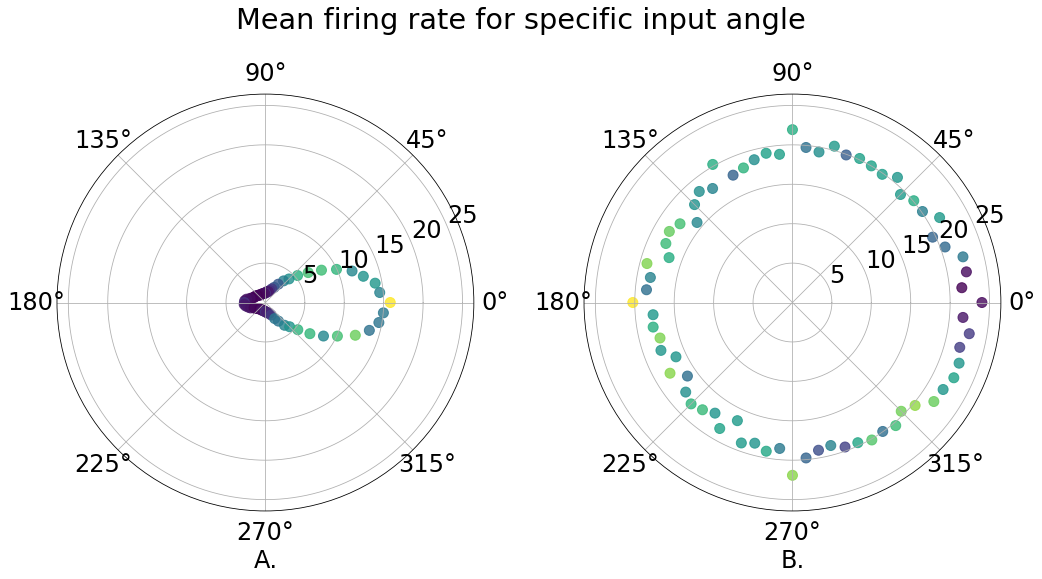

In [60]:
f, (ax,ax2) = plt.subplots(1, 2, figsize=(15, 8), subplot_kw=dict(projection='polar'), dpi=800)

maximus = np.max((random_rate_means, constant_rate_means))
# minimus = np.min((random_rate_means, constant_rate_means))
minimus = 0

c = ax.scatter(radians, random_rate_means, c=random_rate_stds, s=100)
c.set_alpha(0.8)
ax.set_ylim([minimus, 1.1*maximus])
# plt.ylabel("Hz")
# ax2 = plt.subplot(222, projection='polar')
c2 = ax2.scatter(radians, constant_rate_means, c=constant_rate_stds, s=100)
c2.set_alpha(0.8)

# ax.set_xlabel("Angle")
# ax2.set_xlabel("Angle")
ax.set_xlabel("Random delays")
ax2.set_xlabel("Constant delays")
ax2.set_ylim([minimus, 1.1*maximus])

f.suptitle("Mean firing rate for specific input angle", va='bottom')
plt.tight_layout(pad=10)
plt.savefig("comparison_firing_rate_with_angle.png", bbox_inches='tight')
ax.set_xlabel("A.")
ax2.set_xlabel("B.")
plt.savefig("comparison_firing_rate_with_angle_ab.png", bbox_inches='tight')
plt.show()

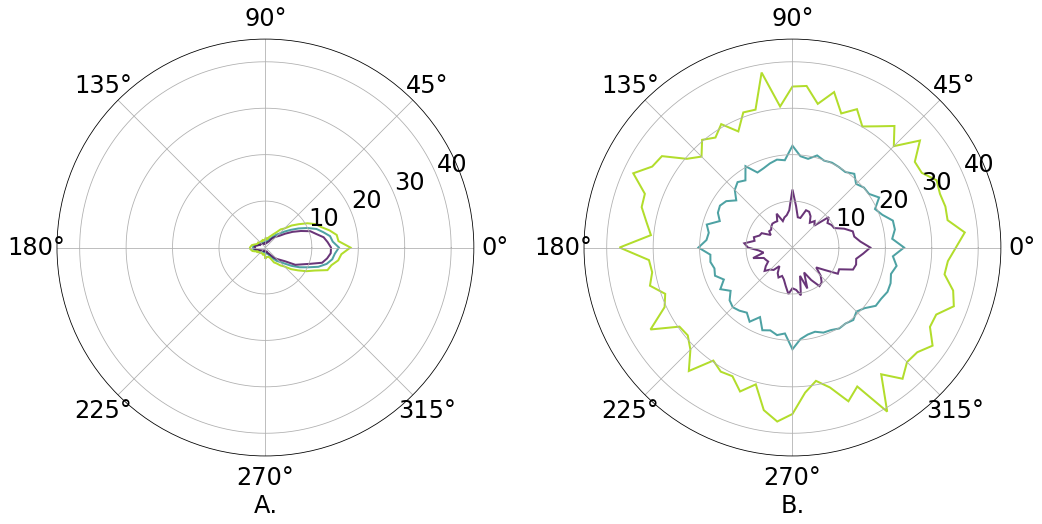

In [61]:
f, (ax,ax2) = plt.subplots(1, 2, figsize=(15, 8), subplot_kw=dict(projection='polar'), dpi=800)

# '#440357'  '#228b8d', '#b2dd2c'

maximus = np.max((random_rate_means, constant_rate_means))
# minimus = np.min((random_rate_means, constant_rate_means))
minimus = 0

c = ax.fill(radians, random_rate_means, fill=False, edgecolor='#228b8d',lw=2, alpha=.8, label="Mean response")
mins = [np.min(r) for r in random_all_rates]
ax.fill(radians, mins, fill=False, edgecolor='#440357',lw=2, alpha=.8, label="Min response")
maxs = [np.max(r) for r in random_all_rates]
ax.fill(radians, maxs, fill=False, edgecolor='#b2dd2c',lw=2, alpha=1, label="Max response")
maximus = np.max(maxs)
# c.set_alpha(0.8)
ax.set_ylim([minimus, 1.1*maximus])
# plt.ylabel("Hz")
# ax2 = plt.subplot(222, projection='polar')
c2 = ax2.fill(radians, constant_rate_means, fill=False, edgecolor='#228b8d',lw=2, alpha=.8, label="Mean response")
mins = [np.min(r) for r in constant_all_rates]
ax2.fill(radians, mins, fill=False, edgecolor='#440357',lw=2, alpha=.8, label="Min response")
maxs = [np.max(r) for r in constant_all_rates]
ax2.fill(radians, maxs, fill=False, edgecolor='#b2dd2c',lw=2, alpha=1, label="Max response")
# c2.set_alpha(0.8)

# ax.set_xlabel("Angle")
# ax2.set_xlabel("Angle")
ax.set_xlabel("Random delays")
ax2.set_xlabel("Constant delays")
ax2.set_ylim([minimus, 1.1*np.max(maxs)])
ax.set_ylim([minimus, 1.1*np.max(maxs)])

# f.suptitle("Mean firing rate for specific input angle", va='bottom')
# plt.tight_layout(pad=10)
plt.savefig("comparison_firing_rate_with_angle_min_max_mean.png", bbox_inches='tight')

ax.set_xlabel("A.")
ax2.set_xlabel("B.")
plt.savefig("comparison_firing_rate_with_angle_min_max_mean_ab.png", bbox_inches='tight')
plt.show()


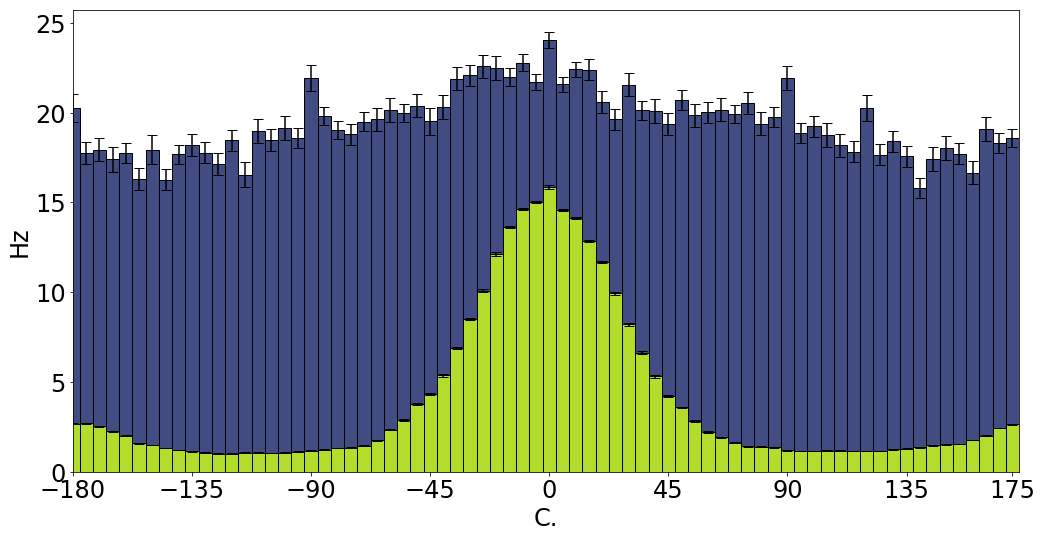

In [62]:
fig = plt.figure(figsize=(15, 8), dpi=800)
y, binEdges = np.histogram(angles, bins=angles.size)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
width = 5

plt.bar(angles-180, np.roll(constant_rate_means,180//5), width=width, yerr=np.roll(constant_rate_sem,180//5),
        color='#414C82', edgecolor='k')
plt.bar(angles-180, np.roll(random_rate_means,180//5), width=width, yerr=np.roll(random_rate_sem,180//5),
        color='#b2dd2c', edgecolor='k')
plt.xlabel("Degree")
plt.ylabel("Hz")
plt.xlim([-177.5, 177.5])
plt.xticks(np.concatenate((np.arange(-180, 180, 45),[175])))
plt.savefig("comparison_firing_rate_with_angle_hist_centred.png")
plt.xlabel("C.")
plt.savefig("comparison_firing_rate_with_angle_hist_centred_c.png")
plt.show()

In [63]:
ttests = []


for i in range(angles.size):
    ttests.append(stats.ttest_ind(random_all_rates[i], constant_all_rates[i], equal_var=False))

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


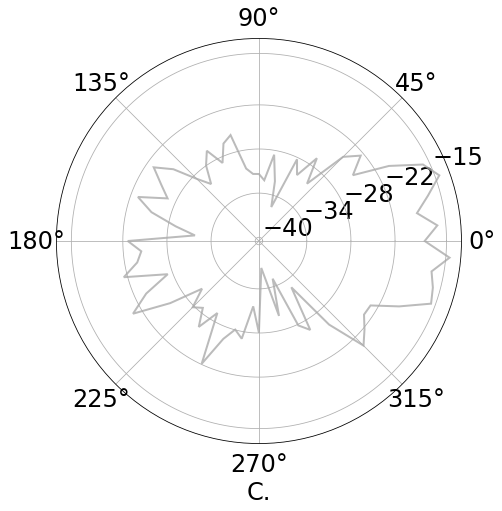

In [64]:
fig = plt.figure(figsize=(7.5, 8), dpi=600)
ax = plt.subplot(111, projection='polar')
c = plt.fill(radians, [t[0] for t in ttests], fill=False, edgecolor='#aaaaaa',lw=2, alpha=.8, zorder=5)
plt.ylim([1.1*np.min([t[0] for t in ttests]), .9*np.max([t[0] for t in ttests])])
# plt.ylabel("Hz")
plt.yticks(np.linspace(1.1*np.min([t[0] for t in ttests]), 1.1*np.max([t[0] for t in ttests]), 5, dtype=int))

tstat = np.asarray([t[0] for t in ttests])
pstat = np.asarray([t[1] for t in ttests])

below_threshold = pstat <= 0.01
# plt.scatter(radians[below_threshold], tstat[below_threshold], c='seagreen', zorder=6)
above_threshold = pstat > 0.01
plt.scatter(radians[above_threshold], tstat[above_threshold], c='orangered', zorder=6)
print above_threshold
# ax.set_title("Mean firing rate for specific input angle\n", va='bottom')
plt.xlabel("Independent t-test")
plt.savefig("ttest_with_angle.png")
plt.xlabel("C.")
plt.savefig("ttest_with_angle_c.png")
plt.show()

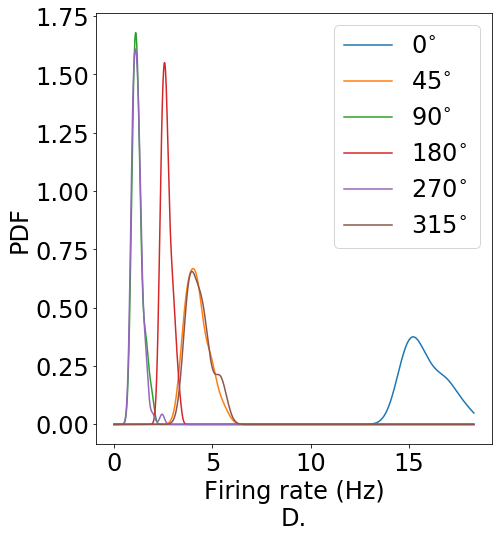

In [65]:
fig = plt.figure(figsize=(7.5, 8), dpi=800)
# rnge= np.arange(0, maximus)

maxs = [np.max(r) for r in random_all_rates]
maximus = np.max(maxs)
rnge= np.linspace(0, maximus, 1000)

k = stats.kde.gaussian_kde(random_all_rates[0],'silverman')
plt.plot(rnge, k(rnge), label="$0^{\circ}$ ")
k = stats.kde.gaussian_kde(random_all_rates[45//5],'silverman')
plt.plot(rnge, k(rnge), label="$45^{\circ}$ ")
k = stats.kde.gaussian_kde(random_all_rates[90//5],'silverman')
plt.plot(rnge, k(rnge), label="$90^{\circ}$ ")
k = stats.kde.gaussian_kde(random_all_rates[180//5],'silverman')
plt.plot(rnge, k(rnge), label="$180^{\circ}$ ")
k = stats.kde.gaussian_kde(random_all_rates[270//5],'silverman')
plt.plot(rnge, k(rnge), label="$270^{\circ}$ ")
k = stats.kde.gaussian_kde(random_all_rates[315//5],'silverman')
plt.plot(rnge, k(rnge), label="$315^{\circ}$ ")



plt.legend(loc='best')
plt.xlabel("Firing rate (Hz)")
plt.ylabel("PDF")
plt.savefig("firing_rate_pdf_random.png", bbox_inches='tight')
plt.xlabel("Firing rate (Hz)\nD.")
plt.savefig("firing_rate_pdf_random_d.png", bbox_inches='tight')
plt.show()

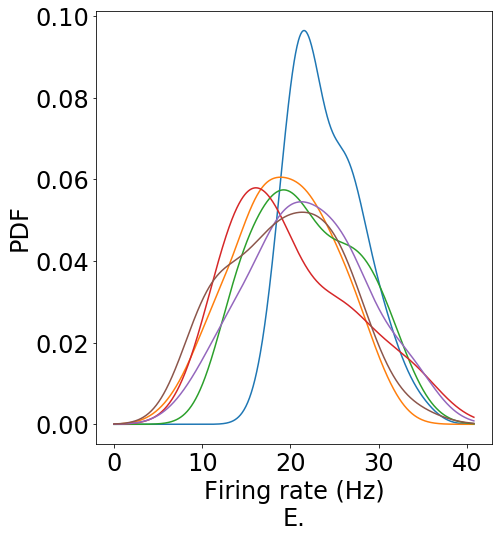

In [66]:
fig = plt.figure(figsize=(7.5, 8), dpi=800)
k = stats.kde.gaussian_kde(constant_all_rates[0],'silverman')
maxs = [np.max(r) for r in constant_all_rates]
maximus = np.max(maxs)
rnge= np.linspace(0, maximus, 1000)
plt.plot(rnge, k(rnge), label="$0^{\circ}$ ")
k = stats.kde.gaussian_kde(constant_all_rates[45//5],'silverman')
plt.plot(rnge, k(rnge), label="$45^{\circ}$ ")
k = stats.kde.gaussian_kde(constant_all_rates[90//5],'silverman')
plt.plot(rnge, k(rnge), label="$90^{\circ}$ ")
k = stats.kde.gaussian_kde(constant_all_rates[180//5],'silverman')
plt.plot(rnge, k(rnge), label="$180^{\circ}$ ")
k = stats.kde.gaussian_kde(constant_all_rates[270//5],'silverman')
plt.plot(rnge, k(rnge), label="$270^{\circ}$ ")
k = stats.kde.gaussian_kde(constant_all_rates[315//5],'silverman')
plt.plot(rnge, k(rnge), label="$315^{\circ}$ ")

# plt.legend(loc='best')
plt.xlabel("Firing rate (Hz)")
plt.ylabel("PDF")
plt.savefig("firing_rate_pdf_constant.png", bbox_inches='tight')
plt.xlabel("Firing rate (Hz)\nE.")
plt.savefig("firing_rate_pdf_constant_e.png", bbox_inches='tight')
plt.show()